## Regression Analysis on English Premier League Matches From 1993 - 2022 Season

This project examines the matches played by teams from 1993 to 2022. All the data were combined from from 1993 to 2022. Teams like Brentford, Bransley, Charlton Athletics and some other few team
played more fewer games. This project examines the Winning Percentage and Pythegorean Winning Percentages for teams using matches won, games played, points earn, goals scored and goals conceded.

In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading data
data = pd.read_csv("EPL_Matches_93_22.csv")
display(data[0:10])

,Year,Team,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue,...,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth
0,1993,Arsenal,25,20,21,8,6,7,30,11.0,...,56,43,35,15,13,16,20.5,42,0.357143,0.601496
1,1993,Aston Villa,36,16,21,13,5,3,44,15.5,...,74,60,37,21,13,10,26.5,42,0.500000,0.724492
2,1993,Blackburn,38,18,21,13,4,4,43,15.0,...,71,66,48,20,11,11,25.5,42,0.476190,0.654054
3,1993,Chelsea,29,22,21,9,7,5,34,12.5,...,56,61,44,14,12,14,21.0,42,0.333333,0.657769
4,1993,Coventry City,29,28,21,7,4,10,25,9.0,...,48,56,49,12,9,15,18.0,39,0.307692,0.566372
5,1993,Crystal Palace,27,25,21,6,9,6,27,10.5,...,49,63,46,11,14,15,19.0,42,0.261905,0.652260
6,1993,Everton,26,27,21,7,6,8,27,10.0,...,53,54,54,15,14,19,19.0,42,0.357143,0.500000
7,1993,Ipswich Town,29,22,21,8,9,4,33,12.5,...,52,62,43,12,13,14,20.0,42,0.285714,0.675215
8,1993,Leeds United,40,17,21,12,8,1,44,16.0,...,51,85,34,12,8,15,19.5,42,0.285714,0.862069
9,1993,Liverpool,41,18,21,13,4,4,43,15.0,...,59,78,39,16,7,15,21.5,42,0.380952,0.800000


### Data Preprocessing

In [3]:
#Data Aggregations
EPL = data.groupby(['Team'])['Goals_for_h', 'Goals_against_a', 'GPh', 'HW', 'HD',
       'HL', 'HPTS', 'hwinvalue', 'Goals_against_h', 'Goals_for_a', 'GPa',
       'AW', 'AD', 'AL', 'APTS', 'awinvalue', 'PTS', 'GF', 'GA', 'W', 'D', 'L',
       'WV', 'GP'].sum().reset_index()
EPL[0:10]

,Team,Goals_for_h,Goals_against_a,GPh,HW,HD,HL,HPTS,hwinvalue,Goals_against_h,...,APTS,awinvalue,PTS,GF,GA,W,D,L,WV,GP
0,Arsenal,1147,486,569,364,129,76,1221,428.5,643,...,891,322.5,2112,1790,1333,610,375,243,751.0,1135
1,Aston Villa,674,572,511,204,149,158,761,278.5,770,...,580,217.5,1341,1444,1150,349,294,384,496.0,1027
2,Barnsley,25,35,19,7,4,8,25,9.0,47,...,10,3.5,35,72,47,10,7,23,12.5,38
3,Birmingham City,162,140,133,50,46,37,196,73.0,218,...,102,40.0,298,380,250,72,68,109,113.0,263
4,Blackburn,542,381,346,167,85,94,586,209.5,520,...,375,141.5,961,1062,760,259,177,248,351.0,691
5,Blackpool,30,37,19,5,5,9,20,7.5,41,...,13,5.0,33,71,59,8,8,19,12.5,36
6,Bolton,317,312,245,92,74,79,350,129.0,424,...,217,81.0,567,741,562,147,129,214,210.0,487
7,Bournemouth,136,148,95,34,25,36,127,46.5,180,...,84,31.0,211,316,252,56,47,90,77.5,189
8,Bradford City,46,58,38,10,15,13,45,17.5,80,...,17,6.5,62,126,80,14,19,42,24.0,76
9,Brentford,22,21,19,7,3,9,24,8.5,35,...,22,8.0,46,57,47,13,9,18,16.5,38


In [4]:
#Selecting the useful columns
EPL = EPL[['Team','PTS', 'GF', 'GA', 'W', 'D', 'L', 'WV','GP']]
EPL.head()

,Team,PTS,GF,GA,W,D,L,WV,GP
0,Arsenal,2112,1790,1333,610,375,243,751.0,1135
1,Aston Villa,1341,1444,1150,349,294,384,496.0,1027
2,Barnsley,35,72,47,10,7,23,12.5,38
3,Birmingham City,298,380,250,72,68,109,113.0,263
4,Blackburn,961,1062,760,259,177,248,351.0,691


In [5]:
#Summary Statistics
EPL.describe()

,PTS,GF,GA,W,D,L,WV,GP
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,632.300000,700.900000,526.380000,171.040000,124.980000,171.000000,230.630000,461.220000
std,634.004032,566.697351,419.606078,183.016667,114.331685,109.735861,225.717536,362.958607
min,30.000000,57.000000,47.000000,5.000000,7.000000,18.000000,12.500000,36.000000
25%,214.250000,286.250000,223.500000,56.250000,52.000000,90.500000,80.875000,193.000000
50%,373.000000,475.000000,361.000000,95.500000,82.500000,141.500000,138.250000,308.500000
75%,783.750000,886.000000,730.500000,212.750000,163.750000,241.750000,285.500000,602.750000
max,2341.000000,1842.000000,1384.000000,696.000000,403.000000,411.000000,822.500000,1141.000000


In [6]:
#Checking data type of the various variables or columns
EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    50 non-null     object 
 1   PTS     50 non-null     int64  
 2   GF      50 non-null     int64  
 3   GA      50 non-null     int64  
 4   W       50 non-null     int64  
 5   D       50 non-null     int64  
 6   L       50 non-null     int64  
 7   WV      50 non-null     float64
 8   GP      50 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 3.6+ KB


In [7]:
#Correlation Coeffiecent for variables
EPL.corr()

,PTS,GF,GA,W,D,L,WV,GP
PTS,1.000000,0.975008,0.973493,0.998259,0.994535,0.749083,0.999714,0.966527
GF,0.975008,1.000000,0.996727,0.961656,0.980936,0.873680,0.979454,0.997455
GA,0.973493,0.996727,1.000000,0.959995,0.983014,0.875510,0.978000,0.997037
W,0.998259,0.961656,0.959995,1.000000,0.988547,0.711420,0.996563,0.950343
D,0.994535,0.980936,0.983014,0.988547,1.000000,0.786300,0.995976,0.978027
L,0.749083,0.873680,0.875510,0.711420,0.786300,1.000000,0.763609,0.893363
WV,0.999714,0.979454,0.978000,0.996563,0.995976,0.763609,1.000000,0.972129
GP,0.966527,0.997455,0.997037,0.950343,0.978027,0.893363,0.972129,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

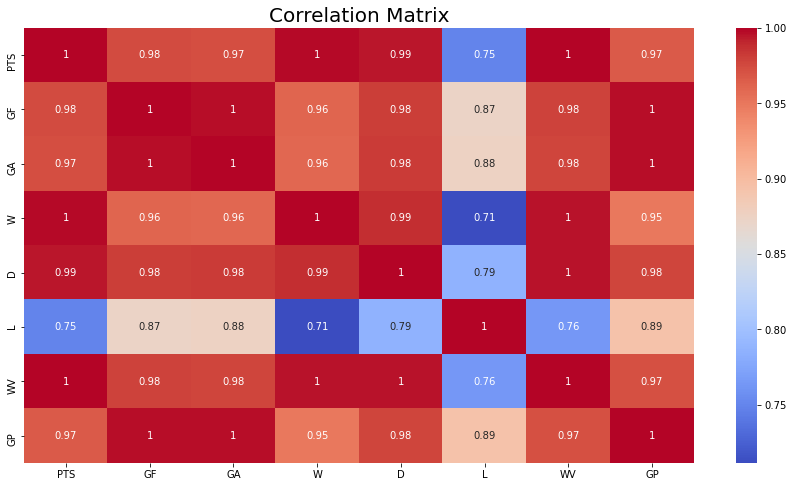

In [8]:
#correlation 
plt.figure(figsize = (15, 8))
sns.heatmap(EPL.corr(), cmap = 'coolwarm', annot = True, data = EPL)
plt.title('Correlation Matrix', fontsize = 20)

In [9]:
#Defining some useful variables for our analysis
EPL['win_pct'] = EPL['W'] / EPL['GP']
EPL['pyth_win_pct'] = EPL['GF'] ** 2 / (EPL['GF'] ** 2 + EPL['GA'] ** 2)

In [10]:
#Creating a new variable to sperate teams with matches more than 460 from teams with less
EPL['Long'] = ['Yes' if EPL.loc[ex, 'GP'] >= 460 else 'No'
               for ex in EPL.index]

In [11]:
#Defining the goals difference variable
# sourcery skip: remove-redundant-slice-index
EPL['Goal_Diff'] = EPL['GF'] - EPL['GA']
display(EPL[0:10])

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct,Long,Goal_Diff
0,Arsenal,2112,1790,1333,610,375,243,751.0,1135,0.537445,0.643266,Yes,457
1,Aston Villa,1341,1444,1150,349,294,384,496.0,1027,0.339825,0.611901,Yes,294
2,Barnsley,35,72,47,10,7,23,12.5,38,0.263158,0.701204,No,25
3,Birmingham City,298,380,250,72,68,109,113.0,263,0.273764,0.697922,No,130
4,Blackburn,961,1062,760,259,177,248,351.0,691,0.374819,0.661320,Yes,302
5,Blackpool,33,71,59,8,8,19,12.5,36,0.222222,0.591528,No,12
6,Bolton,567,741,562,147,129,214,210.0,487,0.301848,0.634831,Yes,179
7,Bournemouth,211,316,252,56,47,90,77.5,189,0.296296,0.611263,No,64
8,Bradford City,62,126,80,14,19,42,24.0,76,0.184211,0.712695,No,46
9,Brentford,46,57,47,13,9,18,16.5,38,0.342105,0.595273,No,10


In [12]:
#Summary Statistics
EPL.describe()

,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct,Goal_Diff
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,632.300000,700.900000,526.380000,171.040000,124.980000,171.000000,230.630000,461.220000,0.312054,0.635867,174.520000
std,634.004032,566.697351,419.606078,183.016667,114.331685,109.735861,225.717536,362.958607,0.095690,0.038976,152.289901
min,30.000000,57.000000,47.000000,5.000000,7.000000,18.000000,12.500000,36.000000,0.121951,0.557841,10.000000
25%,214.250000,286.250000,223.500000,56.250000,52.000000,90.500000,80.875000,193.000000,0.260446,0.611423,64.500000
50%,373.000000,475.000000,361.000000,95.500000,82.500000,141.500000,138.250000,308.500000,0.295837,0.637041,128.000000
75%,783.750000,886.000000,730.500000,212.750000,163.750000,241.750000,285.500000,602.750000,0.338964,0.658808,228.250000
max,2341.000000,1842.000000,1384.000000,696.000000,403.000000,411.000000,822.500000,1141.000000,0.610526,0.712846,511.000000


Text(0.5, 1.0, 'Correlation Matrix')

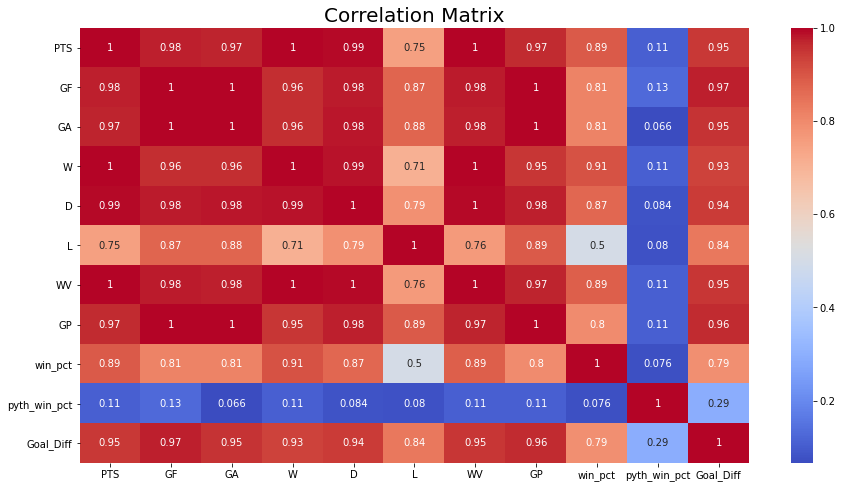

In [13]:
#Correlations 
plt.figure(figsize=(15, 8))
sns.heatmap(EPL.corr(), cmap='coolwarm', annot=True, data=EPL)
plt.title('Correlation Matrix', fontsize=20)

### Exploratory Data Analysis (EDA)

<Figure size 720x576 with 0 Axes>

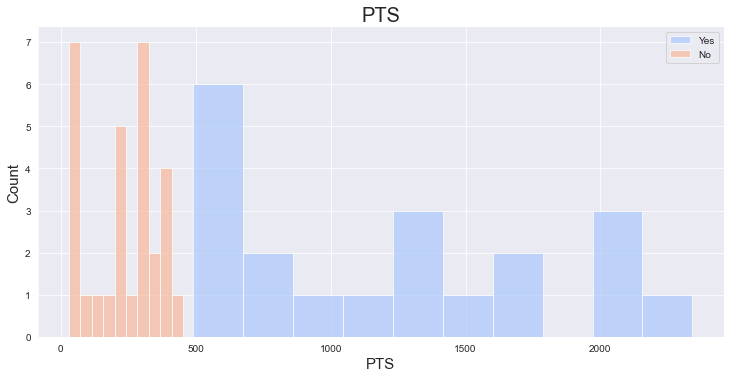

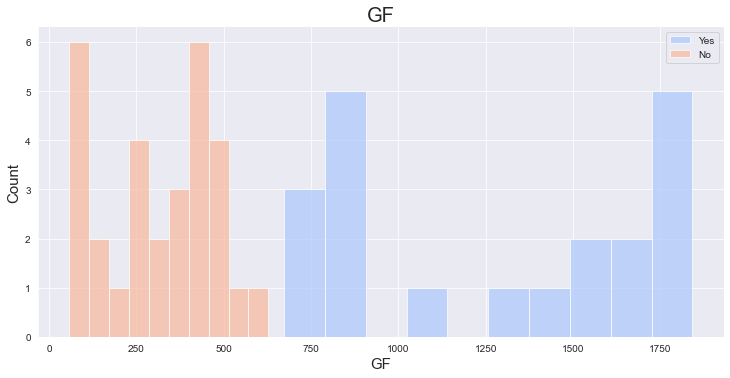

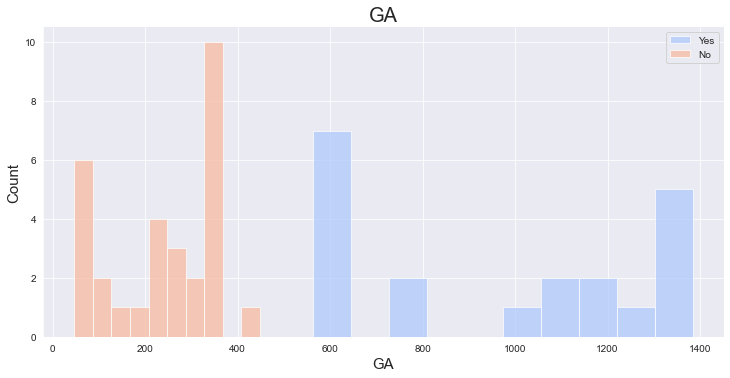

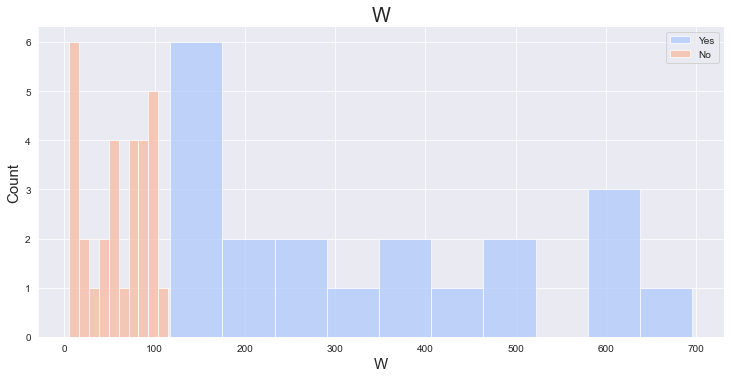

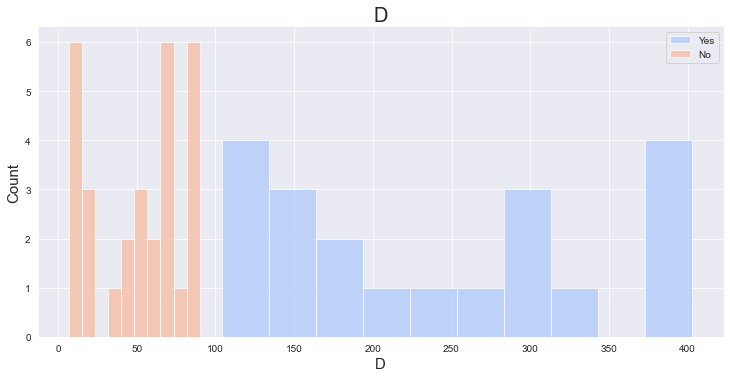

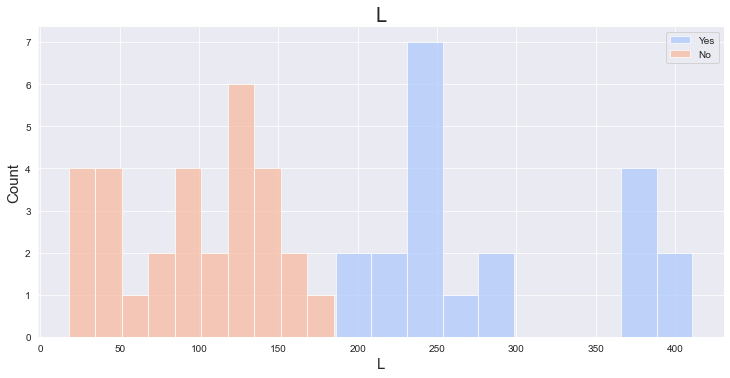

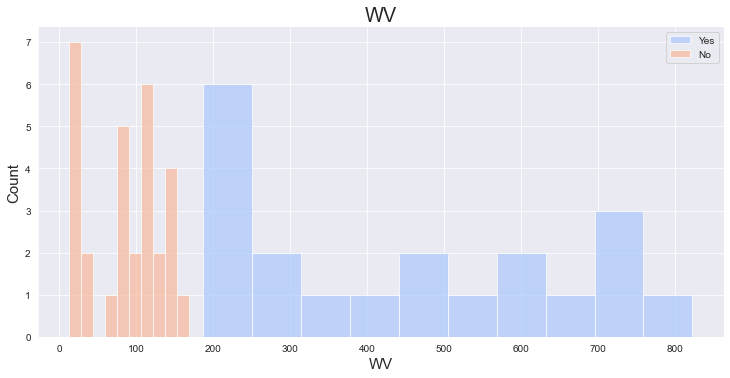

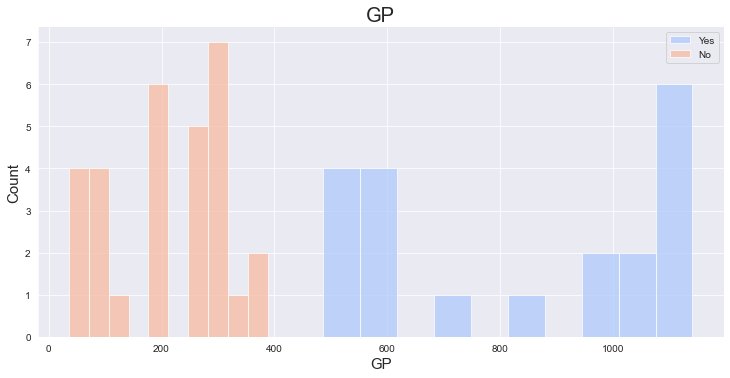

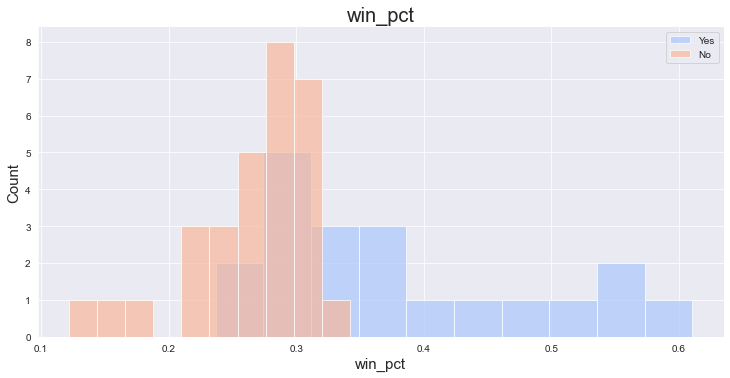

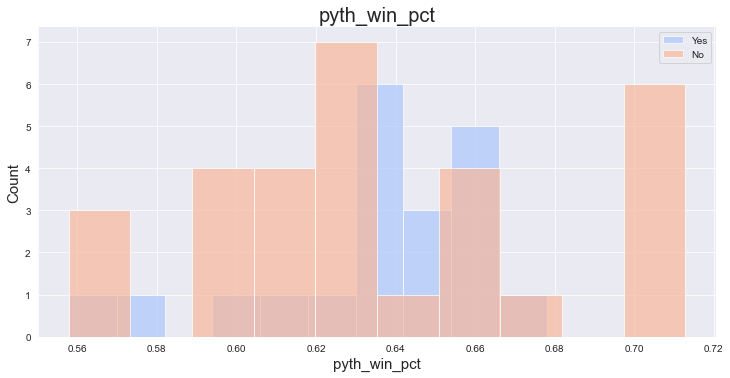

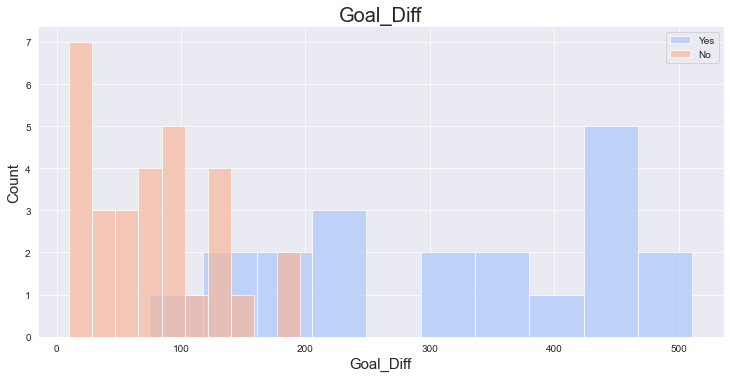

In [14]:
#Histogram for variable
sns.set_style('darkgrid')
plt.figure(figsize = (10, 8))
for feat in EPL.columns:
    if feat not in ['Team', 'Long']:
        g = sns.FacetGrid(EPL, hue='Long', palette='coolwarm',height = 5, aspect=2)
        g = g.map(plt.hist, feat, alpha=0.7)
        plt.title(feat, fontsize=20)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('Count', fontsize = 15)
        plt.legend()

<Figure size 720x360 with 0 Axes>

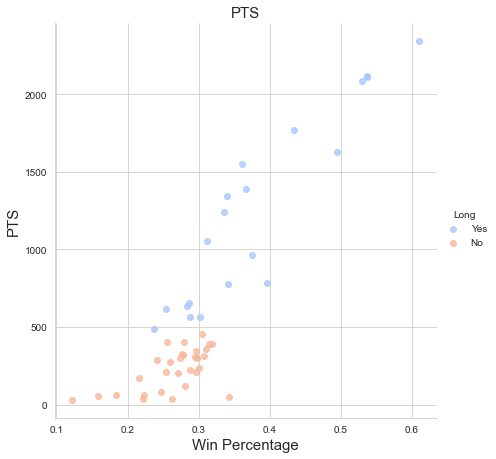

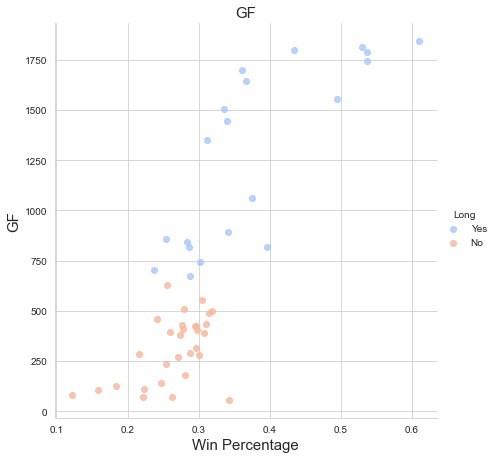

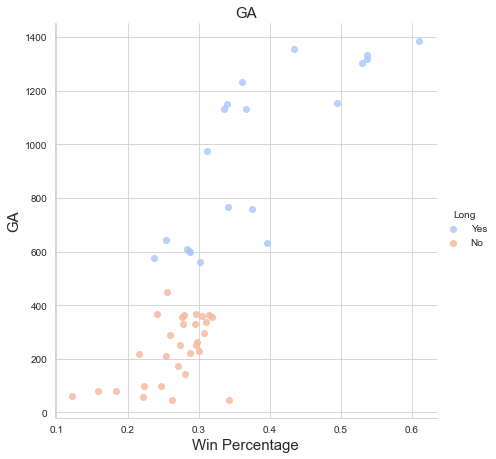

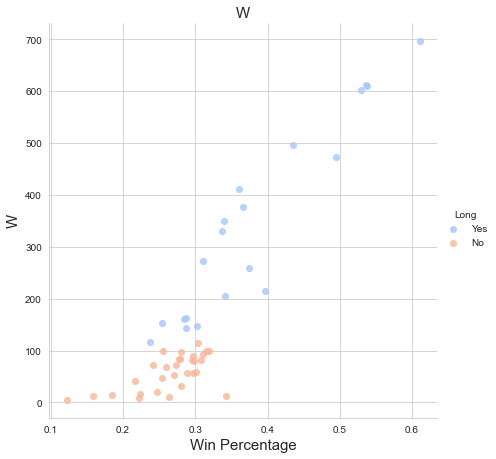

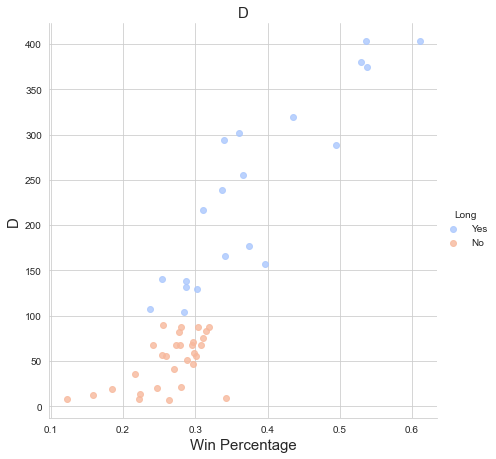

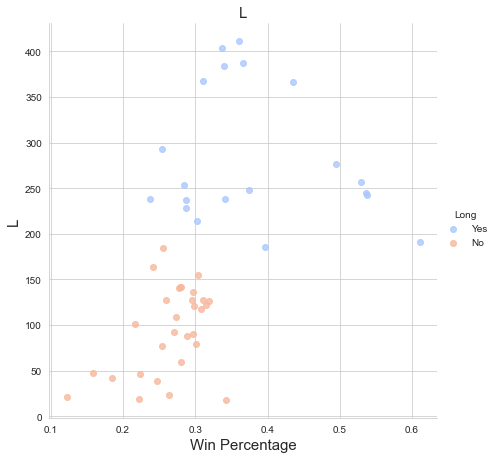

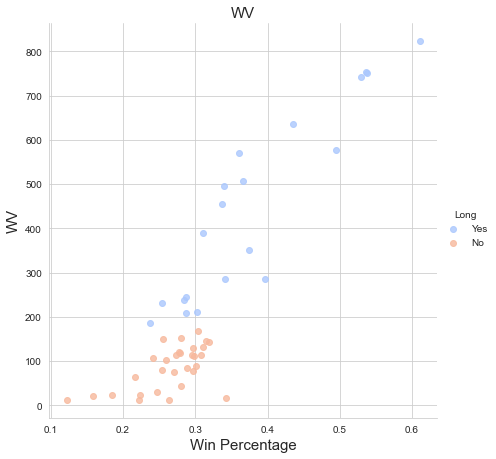

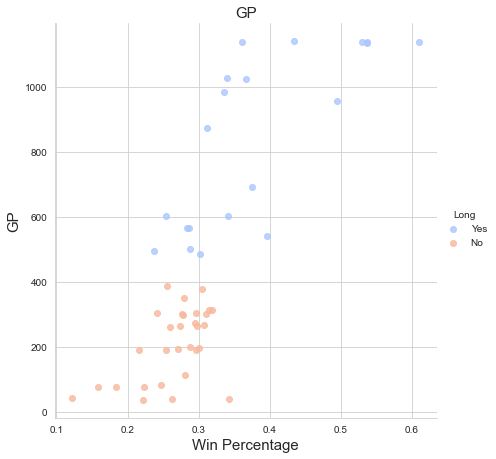

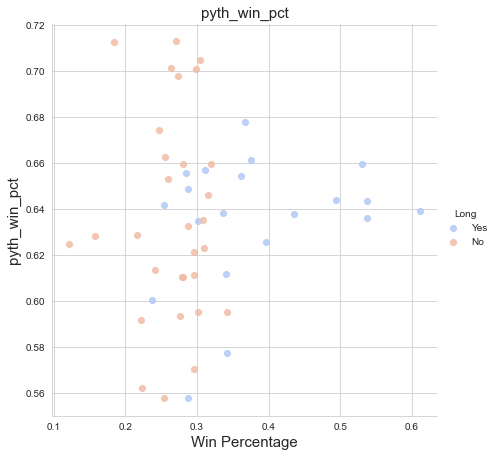

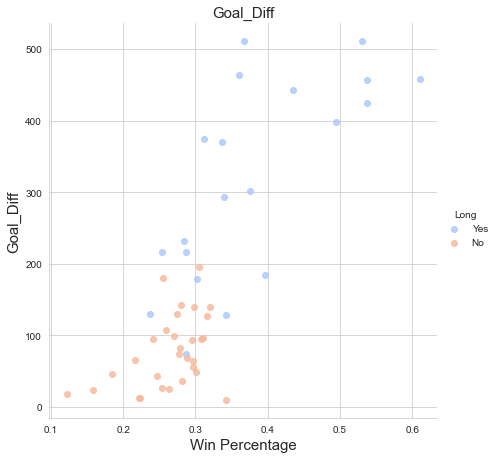

In [15]:
#Regression Plots for winning percentages against the other numeric variables or features
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
for feat in EPL.columns:
    if feat not in ['Team', 'win_pct', 'Long']:
        sns.lmplot(x='win_pct', y = feat, data=EPL, hue='Long',palette='coolwarm', height=6, aspect=1, fit_reg=False)
        plt.title(feat, fontsize=15)
        plt.xlabel('Win Percentage', fontsize = 15)
        plt.ylabel(feat, fontsize = 15)

<Figure size 720x360 with 0 Axes>

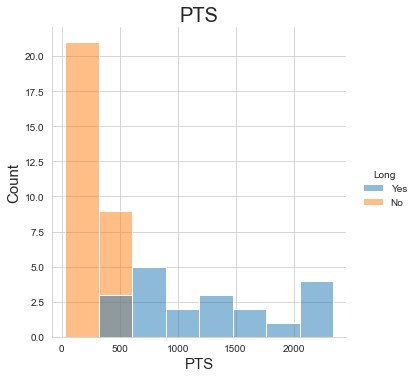

<Figure size 720x360 with 0 Axes>

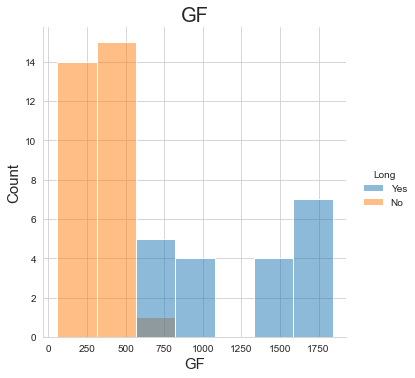

<Figure size 720x360 with 0 Axes>

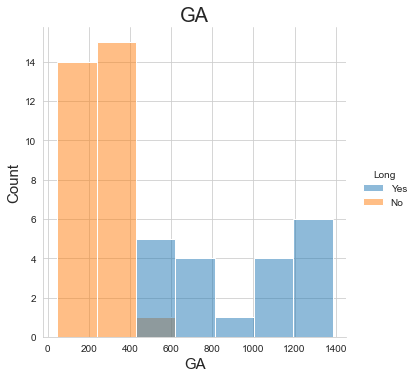

<Figure size 720x360 with 0 Axes>

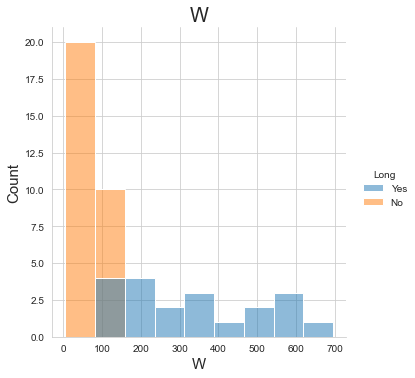

<Figure size 720x360 with 0 Axes>

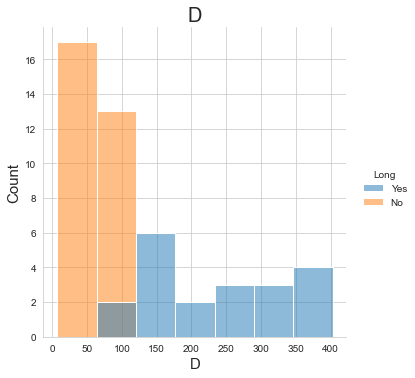

<Figure size 720x360 with 0 Axes>

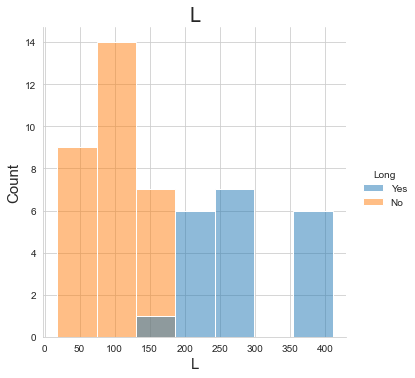

<Figure size 720x360 with 0 Axes>

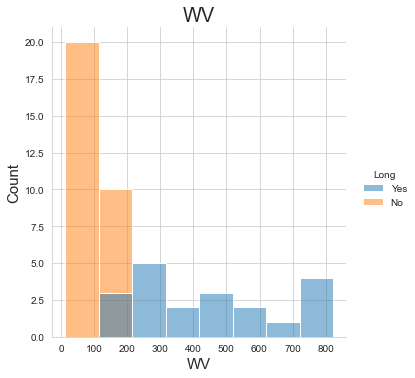

<Figure size 720x360 with 0 Axes>

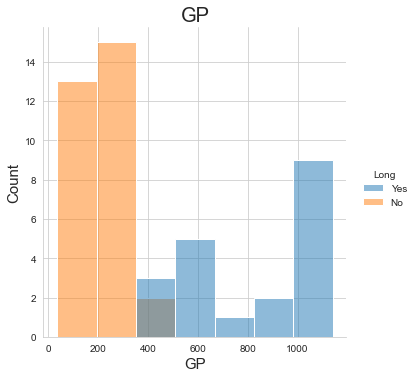

<Figure size 720x360 with 0 Axes>

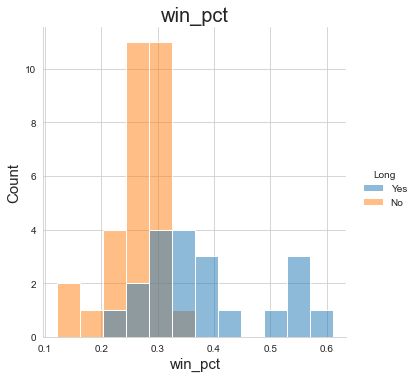

<Figure size 720x360 with 0 Axes>

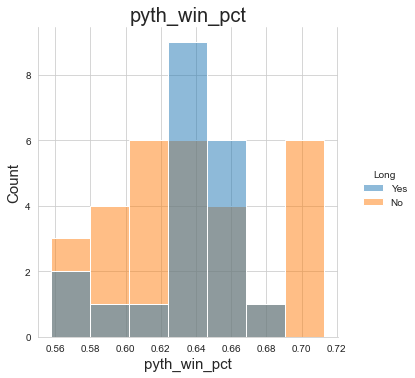

<Figure size 720x360 with 0 Axes>

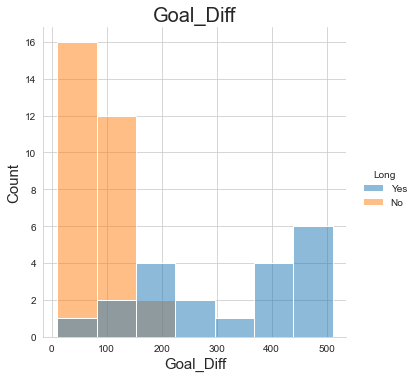

In [16]:
# Distribution plots for useful variable
for feat in EPL.columns:
    if feat not in ['Team', 'Long']:
        plt.figure(figsize=(10, 5))
        sns.displot(EPL, x = feat, hue = 'Long')
        plt.title(feat, fontsize = 20)
        plt.xlabel(feat, fontsize = 15)
        plt.ylabel('Count', fontsize = 15)

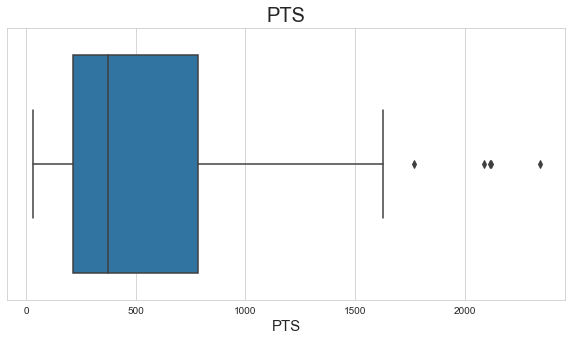

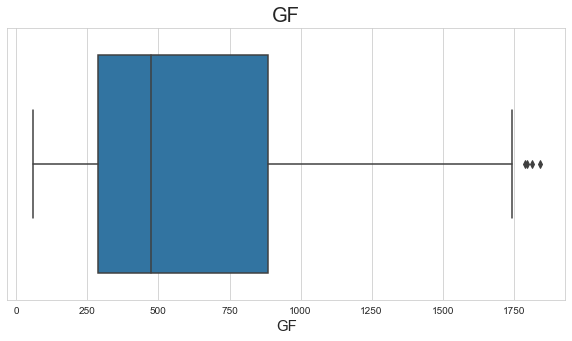

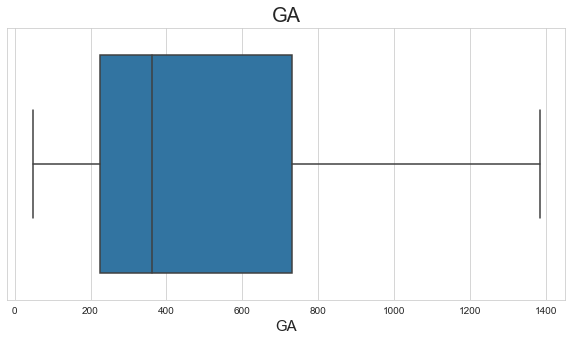

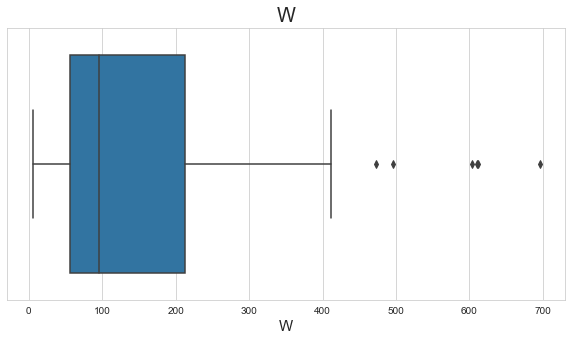

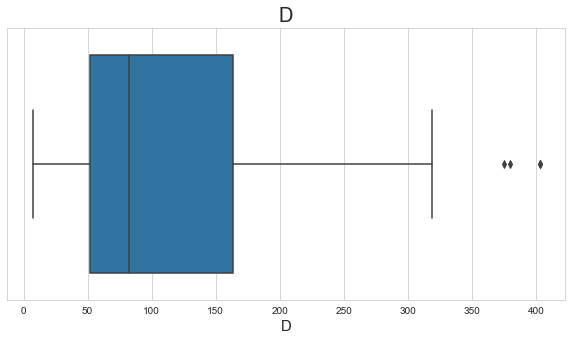

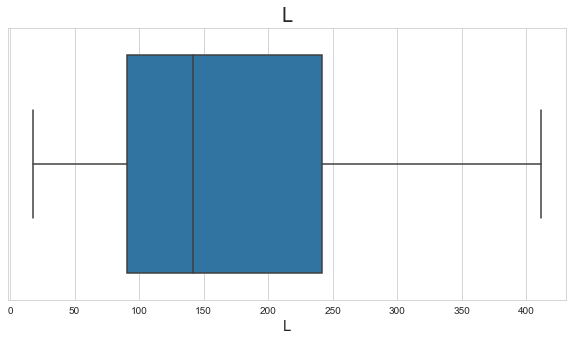

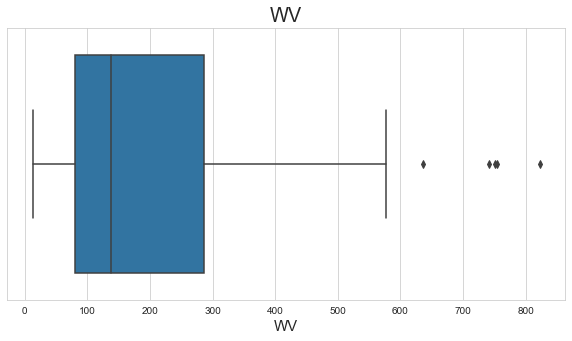

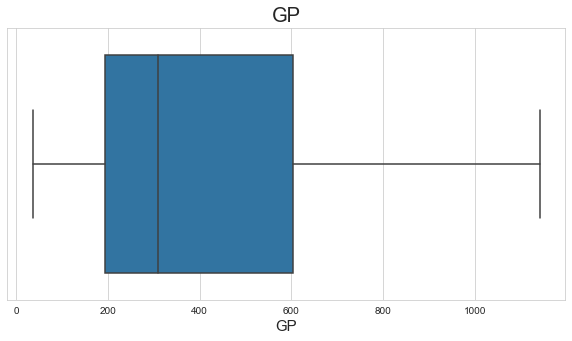

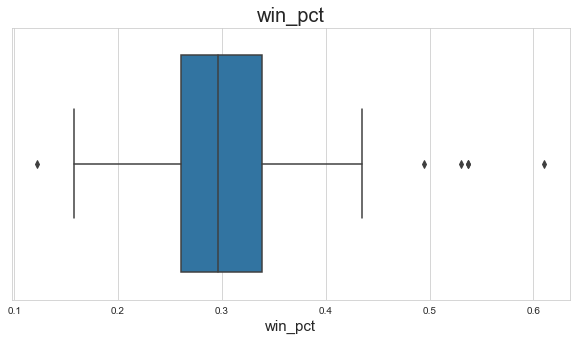

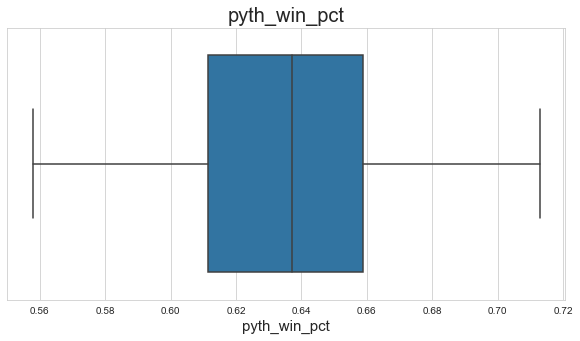

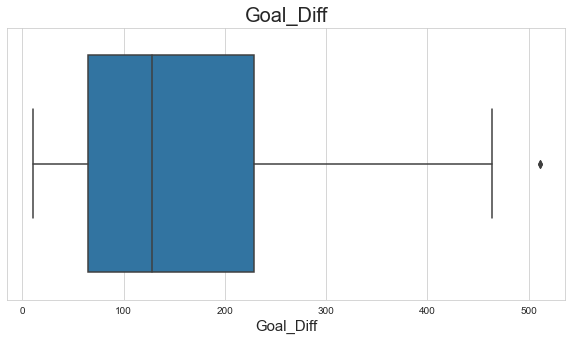

In [17]:
#Boaxplot for each feature
for feat in EPL.columns:
       if feat not in ['Team', 'Long']:
              plt.figure(figsize=(10, 5))
              sns.boxplot(x=feat, data=EPL)
              plt.title(feat, fontsize = 20)
              plt.xlabel(feat, fontsize = 15)

In [18]:
#Finding top 10 teams with most points
EPL.sort_values(by = 'PTS', ascending = False)[0:10]

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct,Long,Goal_Diff
27,Manchester Utd,2341,1842,1384,696,403,191,822.5,1140,0.610526,0.639166,Yes,458
14,Chelsea,2119,1743,1318,612,403,245,753.5,1140,0.536842,0.636218,Yes,425
0,Arsenal,2112,1790,1333,610,375,243,751.0,1135,0.537445,0.643266,Yes,457
25,Liverpool,2087,1816,1305,603,380,257,742.0,1138,0.529877,0.659455,Yes,511
43,Tottenham,1767,1797,1354,496,319,366,635.5,1141,0.434706,0.637865,Yes,443
26,Manchester City,1627,1553,1155,473,289,276,577.0,957,0.494253,0.643864,Yes,398
18,Everton,1550,1698,1234,411,302,411,569.5,1139,0.360843,0.654387,Yes,464
29,Newcastle Utd,1391,1644,1133,376,255,387,507.5,1026,0.366472,0.677985,Yes,511
1,Aston Villa,1341,1444,1150,349,294,384,496.0,1027,0.339825,0.611901,Yes,294
46,West Ham,1242,1503,1132,331,239,404,455.5,984,0.336382,0.638060,Yes,371


In [19]:
#Teams with most games played
EPL.sort_values(by='GP', ascending=False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct,Long,Goal_Diff
43,Tottenham,1767,1797,1354,496,319,366,635.5,1141,0.434706,0.637865,Yes,443
14,Chelsea,2119,1743,1318,612,403,245,753.5,1140,0.536842,0.636218,Yes,425
27,Manchester Utd,2341,1842,1384,696,403,191,822.5,1140,0.610526,0.639166,Yes,458
18,Everton,1550,1698,1234,411,302,411,569.5,1139,0.360843,0.654387,Yes,464
25,Liverpool,2087,1816,1305,603,380,257,742.0,1138,0.529877,0.659455,Yes,511
0,Arsenal,2112,1790,1333,610,375,243,751.0,1135,0.537445,0.643266,Yes,457
1,Aston Villa,1341,1444,1150,349,294,384,496.0,1027,0.339825,0.611901,Yes,294
29,Newcastle Utd,1391,1644,1133,376,255,387,507.5,1026,0.366472,0.677985,Yes,511
46,West Ham,1242,1503,1132,331,239,404,455.5,984,0.336382,0.638060,Yes,371
26,Manchester City,1627,1553,1155,473,289,276,577.0,957,0.494253,0.643864,Yes,398


In [20]:
#Teams with high winning percentages
EPL.sort_values(by='win_pct', ascending=False).head(10)

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct,Long,Goal_Diff
27,Manchester Utd,2341,1842,1384,696,403,191,822.5,1140,0.610526,0.639166,Yes,458
0,Arsenal,2112,1790,1333,610,375,243,751.0,1135,0.537445,0.643266,Yes,457
14,Chelsea,2119,1743,1318,612,403,245,753.5,1140,0.536842,0.636218,Yes,425
25,Liverpool,2087,1816,1305,603,380,257,742.0,1138,0.529877,0.659455,Yes,511
26,Manchester City,1627,1553,1155,473,289,276,577.0,957,0.494253,0.643864,Yes,398
43,Tottenham,1767,1797,1354,496,319,366,635.5,1141,0.434706,0.637865,Yes,443
23,Leeds United,786,816,631,215,157,186,285.5,542,0.396679,0.625795,Yes,185
4,Blackburn,961,1062,760,259,177,248,351.0,691,0.374819,0.661320,Yes,302
29,Newcastle Utd,1391,1644,1133,376,255,387,507.5,1026,0.366472,0.677985,Yes,511
18,Everton,1550,1698,1234,411,302,411,569.5,1139,0.360843,0.654387,Yes,464


In [21]:
#Teams with most goals scored
EPL.sort_values(by='GF', ascending=False)[0:10]

,Team,PTS,GF,GA,W,D,L,WV,GP,win_pct,pyth_win_pct,Long,Goal_Diff
27,Manchester Utd,2341,1842,1384,696,403,191,822.5,1140,0.610526,0.639166,Yes,458
25,Liverpool,2087,1816,1305,603,380,257,742.0,1138,0.529877,0.659455,Yes,511
43,Tottenham,1767,1797,1354,496,319,366,635.5,1141,0.434706,0.637865,Yes,443
0,Arsenal,2112,1790,1333,610,375,243,751.0,1135,0.537445,0.643266,Yes,457
14,Chelsea,2119,1743,1318,612,403,245,753.5,1140,0.536842,0.636218,Yes,425
18,Everton,1550,1698,1234,411,302,411,569.5,1139,0.360843,0.654387,Yes,464
29,Newcastle Utd,1391,1644,1133,376,255,387,507.5,1026,0.366472,0.677985,Yes,511
26,Manchester City,1627,1553,1155,473,289,276,577.0,957,0.494253,0.643864,Yes,398
46,West Ham,1242,1503,1132,331,239,404,455.5,984,0.336382,0.638060,Yes,371
1,Aston Villa,1341,1444,1150,349,294,384,496.0,1027,0.339825,0.611901,Yes,294


### Regression Analysis to find the best predictors / consituent of winning percentage

In [22]:
#win percentage and pythegorean win percentage
reg1 = smf.ols(formula = 'win_pct ~ pyth_win_pct', data = EPL).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.2759
Date:                Sun, 01 Jan 2023   Prob (F-statistic):              0.602
Time:                        21:42:51   Log-Likelihood:                 47.034
No. Observations:                  50   AIC:                            -90.07
Df Residuals:                      48   BIC:                            -86.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1940      0.225      0.862   

In [23]:
#win percentage and  games played
reg2 = smf.ols(formula='win_pct ~ GP', data=EPL).fit()
print(reg2.summary())


                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     83.36
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           4.56e-12
Time:                        21:42:51   Log-Likelihood:                 72.060
No. Observations:                  50   AIC:                            -140.1
Df Residuals:                      48   BIC:                            -136.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2152      0.013     16.001      0.0

In [24]:
#win percentage and Goals Conceded
reg3 = smf.ols(formula='win_pct ~ GF', data=EPL).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     94.83
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           5.99e-13
Time:                        21:42:51   Log-Likelihood:                 74.153
No. Observations:                  50   AIC:                            -144.3
Df Residuals:                      48   BIC:                            -140.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2156      0.013     16.999      0.0

In [25]:
#win percentage, games played and games conceded
reg4 = smf.ols(formula='win_pct ~ GP+GF', data=EPL).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     59.01
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.52e-13
Time:                        21:42:51   Log-Likelihood:                 78.288
No. Observations:                  50   AIC:                            -150.6
Df Residuals:                      47   BIC:                            -144.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2269      0.012     18.267      0.0

In [26]:
#win percentage and goals difference
reg5 = smf.ols(formula='win_pct ~ Goal_Diff', data=EPL).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     79.11
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.02e-11
Time:                        21:42:51   Log-Likelihood:                 71.236
No. Observations:                  50   AIC:                            -138.5
Df Residuals:                      48   BIC:                            -134.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2255      0.013     17.548      0.0

In [27]:
#win percentage games played, goals scored and gaols conceded
reg8 = smf.ols(formula='win_pct ~ GP+GF+GA', data=EPL).fit()
print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:                win_pct   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     43.59
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.70e-13
Time:                        21:42:52   Log-Likelihood:                 80.544
No. Observations:                  50   AIC:                            -153.1
Df Residuals:                      46   BIC:                            -145.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2267      0.012     18.889      0.0

In [28]:
#saving the processed data
EPL.to_csv("EPL_full.csv", index = False)

### Conclusion

There were some outliers in the data, because some teams have played fewer games than 50 in the top flight league and Manchester United, Chelsea and Arsenals being the top performing and consistent teams. Manchester United have dominated the league for a longer period of teams and Team Like has has been ON and OFF  for some time. 

In determining the factors that contributed to the win percentages for teams, it is found that factors such as the number of games played, the number of goals scored and conceded are the best determinants of winning percentages in order words the overall perfromance of teams in the league. using this factors yield a R-squared and Adjusted R-squared of 0.740 (74%) and 0.730 (73%) for the regression, with all the factors being statistically significant. Surprisely, the more the number of games played, the lower with win percentage for a teams and with number of goals scored and conceded having the same coffiecents.